In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib widget

In [12]:
def straight_line(x, m):
    return m * x

n_sample = 30
true_m = 2
x = np.linspace(0, 10, n_sample)
data = np.array([x, straight_line(x, true_m)])

# add some noise
noise = np.random.normal(0, 0.3, n_sample)
data[1] += noise

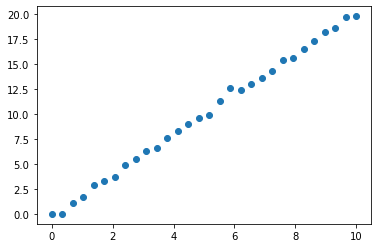

In [13]:
# plot the data
plt.plot(x, data[1], 'o')

In [14]:
def chi_square(data, function, *parameters):
    # x = data[0], y = data[1]
    # calculate the model
    model = function(data[0], *parameters)

    # calculate the chi-square value
    chi_square_value = np.sum((data[1] - model)**2)

    return chi_square_value

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

@interact(m=widgets.FloatSlider(min=1, max=3, step=0.01, value=2))
def draw(m):
    # calculate the chi-square value
    chi_square_value = chi_square(data, straight_line, m)

    # plot the data
    axes[0].clear()
    axes[0].plot(x, data[1], 'ko')
    axes[0].plot(x, straight_line(x, m), 'r-')

    # plot chi-square
    axes[1].plot(m, chi_square_value, 'bo')

    # show the plot and decorate
    axes[0].annotate('$\chi^2$ = {:.2f}'.format(chi_square_value), (0.01, 0.95), xycoords='axes fraction')
    axes[0].set_xlim(-1, 11)
    axes[0].set_ylim(-1, 30)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[1].set_xlim(1, 3)
    axes[1].set_ylim(0, 1000)
    axes[1].set_xlabel('m')
    axes[1].set_ylabel('$\chi^{2}$')

    plt.show();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=2.0, description='m', max=3.0, min=1.0, step=0.01), Output()), _dom_cl…